In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv("../data_f1db/f1db-races-qualifying-results.csv")
df2 = pd.read_csv("../data_f1db/f1db-races.csv")

df2.columns

Index(['id', 'year', 'round', 'date', 'time', 'grandPrixId', 'officialName',
       'qualifyingFormat', 'sprintQualifyingFormat', 'circuitId',
       'circuitType', 'direction', 'courseLength', 'turns', 'laps', 'distance',
       'scheduledLaps', 'scheduledDistance', 'driversChampionshipDecider',
       'constructorsChampionshipDecider', 'preQualifyingDate',
       'preQualifyingTime', 'freePractice1Date', 'freePractice1Time',
       'freePractice2Date', 'freePractice2Time', 'freePractice3Date',
       'freePractice3Time', 'freePractice4Date', 'freePractice4Time',
       'qualifying1Date', 'qualifying1Time', 'qualifying2Date',
       'qualifying2Time', 'qualifyingDate', 'qualifyingTime',
       'sprintQualifyingDate', 'sprintQualifyingTime', 'sprintRaceDate',
       'sprintRaceTime', 'warmingUpDate', 'warmingUpTime'],
      dtype='object')

In [8]:
cleaned = df[df['year'] > 1984]
cleaned = cleaned[cleaned['year'] < 2025]

cleaned.head(-10)

,raceId,year,round,positionDisplayOrder,positionNumber,positionText,driverNumber,driverId,constructorId,engineManufacturerId,...,q1Millis,q2,q2Millis,q3,q3Millis,gap,gapMillis,interval,intervalMillis,laps
9862,405,1985,1,1,1.0,1,27,michele-alboreto,ferrari,ferrari,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9863,405,1985,1,2,2.0,2,6,keke-rosberg,williams,honda,...,NaN,NaN,NaN,NaN,NaN,+0.096,96.0,+0.096,96.0,NaN
9864,405,1985,1,3,3.0,3,11,elio-de-angelis,lotus,renault,...,NaN,NaN,NaN,NaN,NaN,+0.313,313.0,+0.217,217.0,NaN
9865,405,1985,1,4,4.0,4,12,ayrton-senna,lotus,renault,...,NaN,NaN,NaN,NaN,NaN,+0.621,621.0,+0.308,308.0,NaN
9866,405,1985,1,5,5.0,5,5,nigel-mansell,williams,honda,...,NaN,NaN,NaN,NaN,NaN,+1.080,1080.0,+0.459,459.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26221,1125,2024,24,6,6.0,6,10,pierre-gasly,alpine,renault,...,83548.0,1:23.086,83086.0,1:22.984,82984.0,+0.389,389.0,+0.039,39.0,18.0
26222,1125,2024,24,7,7.0,7,63,george-russell,mercedes,mercedes,...,83678.0,1:23.283,83283.0,1:23.132,83132.0,+0.537,537.0,+0.148,148.0,19.0
26223,1125,2024,24,8,8.0,8,14,fernando-alonso,aston-martin,mercedes,...,83794.0,1:23.268,83268.0,1:23.196,83196.0,+0.601,601.0,+0.064,64.0,19.0
26224,1125,2024,24,9,9.0,9,77,valtteri-bottas,kick-sauber,ferrari,...,83481.0,1:23.341,83341.0,1:23.204,83204.0,+0.609,609.0,+0.008,8.0,15.0


In [13]:
cleaned.columns
cleaned.dtypes

raceId                    int64
year                      int64
round                     int64
positionDisplayOrder      int64
positionNumber          float64
positionText             object
driverNumber              int64
driverId                 object
constructorId            object
engineManufacturerId     object
tyreManufacturerId       object
time                     object
timeMillis              float64
q1                       object
q1Millis                float64
q2                       object
q2Millis                float64
q3                       object
q3Millis                float64
gap                      object
gapMillis               float64
interval                 object
intervalMillis          float64
laps                    float64
dtype: object

In [47]:
print(cleaned['gap'].loc[cleaned.index[-10]])
cleaned['Min_Qual'] = cleaned[["q1Millis","q2Millis","q3Millis"]].min(axis =1)

nan


(950.0, 960.0)

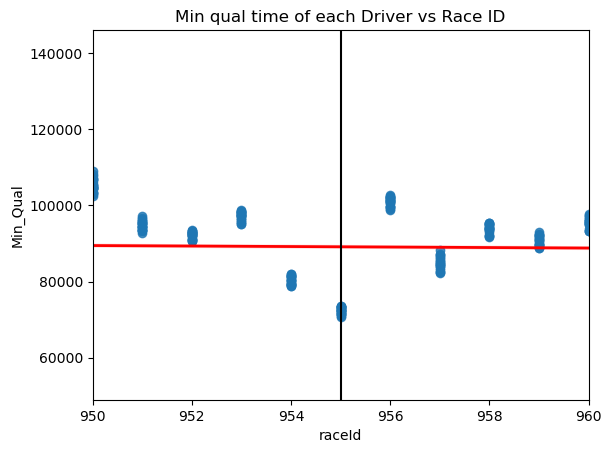

In [91]:
sns.regplot(data = cleaned,
             x = 'raceId', 
             y = 'Min_Qual',
             line_kws= {'color':'red', "linewidth" : 2},
             order = 4,)

plt.title("Min qual time of each Driver vs Race ID")
plt.axvline(x = 955, color = 'black')
plt.xlim(950,960)

        q1Millis  q2Millis  q3Millis
raceId                              
405          NaN       NaN       NaN
406          NaN       NaN       NaN
407          NaN       NaN       NaN
408          NaN       NaN       NaN
409          NaN       NaN       NaN
...          ...       ...       ...
1121      1567.0    1516.0    1419.0
1122      3741.0    4770.0    5593.0
1123      1298.0    1690.0   15794.0
1124      1473.0    1224.0     980.0
1125       803.0     892.0     669.0

[721 rows x 3 columns]
raceId
405        NaN
406        NaN
407        NaN
408        NaN
409        NaN
         ...  
1121    2126.0
1122    8858.0
1123    2172.0
1124    2194.0
1125    1510.0
Name: value, Length: 721, dtype: float64


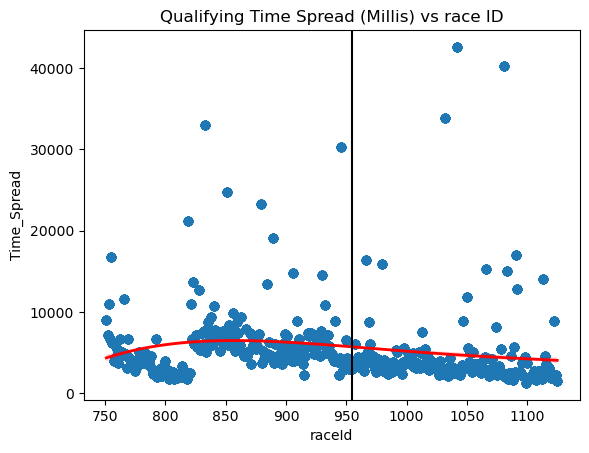

In [89]:
print(cleaned.groupby('raceId')[["q1Millis","q2Millis","q3Millis"]].agg(lambda x: x.max() - x.min()) )#.min(axis=1))  


# cleaned["Time_Spread"] = cleaned.groupby('raceId')[["q1Millis","q2Millis","q3Millis"]].agg(lambda x: x.max() - x.min()).min(axis=1)
# print(cleaned["Time_Spread"])

df_melted = cleaned.melt(id_vars='raceId', value_vars = "Min_Qual") #This finds the largest gap between all 
spread = df_melted.groupby('raceId')['value'].agg(lambda x: x.max() - x.min())
cleaned["Time_Spread"] = cleaned['raceId'].map(spread)
print(spread)



sns.regplot(data = cleaned,
             x = 'raceId', 
             y = 'Time_Spread',
             line_kws= {'color':'red', "linewidth" : 2},
             order = 4)

plt.title("Qualifying Time Spread (Millis) vs race ID")
plt.axvline(x = 955, color = 'black')
# plt.xlim(1121,1125)
# plt.ylim(0,20000)


(750.0, 775.0)

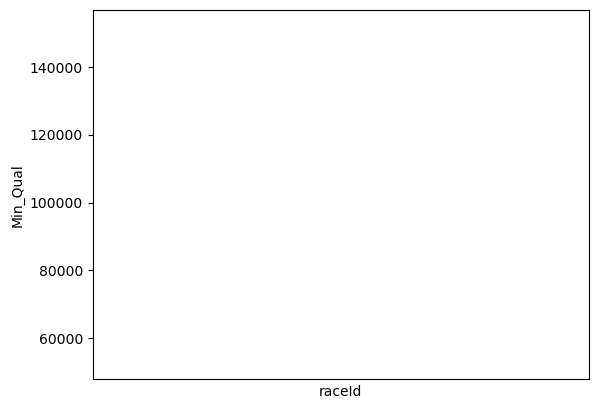

In [93]:
sns.violinplot(x =cleaned['raceId'], y = cleaned['Min_Qual'])
plt.xlim(750,775)

In [ ]:
small_set = df[df['raceId'] == 751]

small_set.describe()

,raceId,year,round,positionDisplayOrder,positionNumber,driverNumber,timeMillis,q1Millis,q2Millis,q3Millis,gapMillis,intervalMillis,laps
count,22.0,22.0,22.0,22.000000,22.000000,22.000000,0.0,21.000000,16.000000,10.000000,9.000000,9.000000,22.000000
mean,751.0,2006.0,1.0,11.500000,11.500000,11.954545,NaN,94289.666667,92394.125000,92444.300000,1125.888889,277.222222,14.363636
std,0.0,0.0,0.0,6.493587,6.493587,6.938349,NaN,1806.382167,811.734675,911.203972,889.646762,176.981481,7.556426
min,751.0,2006.0,1.0,1.000000,1.000000,1.000000,NaN,92433.000000,91215.000000,91431.000000,47.000000,47.000000,2.000000
25%,751.0,2006.0,1.0,6.250000,6.250000,6.250000,NaN,93310.000000,92000.000000,91587.250000,271.000000,106.000000,7.750000
50%,751.0,2006.0,1.0,11.500000,11.500000,11.500000,NaN,93882.000000,92207.500000,92371.500000,1148.000000,384.000000,12.500000
75%,751.0,2006.0,1.0,16.750000,16.750000,17.750000,NaN,94439.000000,92677.500000,93085.500000,1681.000000,427.000000,20.000000
max,751.0,2006.0,1.0,22.000000,22.000000,23.000000,NaN,100270.000000,94606.000000,93926.000000,2495.000000,462.000000,26.000000


In [98]:
print(len(small_set))

22


C:\Users\merli\AppData\Local\Temp\ipykernel_6308\3244234342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_set['Min_Qual'] = small_set[["q1Millis","q2Millis","q3Millis"]].min(axis =1)


<Axes: xlabel='positionDisplayOrder', ylabel='Min_Qual'>

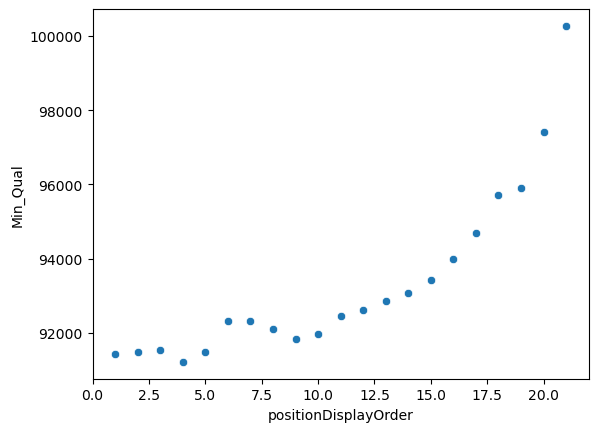

In [107]:
small_set['Min_Qual'] = small_set[["q1Millis","q2Millis","q3Millis"]].min(axis =1)

sns.scatterplot(data = small_set,x = 'positionDisplayOrder', y = "Min_Qual")
